<a href="https://colab.research.google.com/github/ethancma/GaussCircleConjecture/blob/main/Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Exploration 1 - Gauss's Circle Conjecture**
 

In [ ]:
import math
import numpy as np
from numpy.polynomial import polynomial as P
import matplotlib.pyplot as plt

We begin with a no optimizations brute force approach that simply parses each $x$ value in the set $\{0, 1,...,r\}$, and each $y$ value in the set $\{1, ..., r\}$, and checks if $x^2+y^2 < r^2$ and if so adds it as a lattice point. However this only counts the lattice points in one quadrant of the circle, so we multiply the final count by 4, and finally we add 1 for the point $(0, 0)$ which is skipped.

In [ ]:
def bf_L(r):
    lattice_points = 0
    for i in range(r + 1):
        for j in range(1, r + 1):
            if i**2 + j**2 <= r**2:
                lattice_points += 1
    return 4 * lattice_points + 1

print(bf_L(0))
print(bf_L(1))
print(bf_L(2))
print(bf_L(3))

1
5
13
29


We now define an area function A, a lattice counting function L, and an error function E.

In [ ]:
import math

def A(r):
  return r**2 * math.pi


def L(r):
  i = 1
  ans = 0
  while i <= r:
    ans += math.floor(math.sqrt(r**2 - i**2)) + 1
    i += 1
  return 1 + ans * 4


def E(r):
  return A(r) - L(r)


To get a sense of how the error grows with R, we will perform a power regression on a list of values from the function E.

In [ ]:
x = []
y = []


print("Creating list of errors, in log space so we can do a linear regression")
for i in range(1, 1000):
  error = E(i)
  if error > 0:
    x.append(math.log(i))
    y.append(math.log(E(i)))
print("Finished")



c, stats = P.polyfit(x, y, 1, full=True)
print("\nResult...\n", c)
print("\nResult...\n", stats)

Creating list of errors, in log space so we can do a linear regression
Finished

Result...
 [-0.2399114   0.67853623]

Result...
 [array([359.13952698]), 2, array([1.41013425, 0.10733775]), 2.1760371282653068e-13]


Plotting graphs so we can get a better look

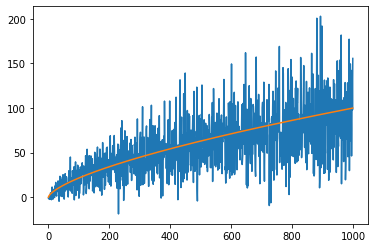

In [ ]:
import matplotlib.pyplot as plt


x = []
error_y = []
r_2_3 = []

for i in range(1000):
    x.append(i)
    error_y.append(E(i))
    r_2_3.append(i**(2/3))

fig, ax = plt.subplots()
ax.plot(x, error_y)
ax.plot(x, r_2_3)
plt.show()

An obvious generalization of this problem that merits inspection is to see how this idea extends to shapes beyond circles. Furthermore, we will see how if this idea extends to volume as opposed to area. 

**Area of an ellipse**

In [3]:
def ellipse_A(a,b):
  return math.pi*a*b

**Lattice points of an ellipse**

In [4]:
def equation_satisfied(x, y, a, b):
  return (x**2)/(a**2)+(y**2)/(b**2) <= 1

def ellipse_L(a, b):
  quad_one_points = 0
  i = 1
  while i < abs(a)+1:
    j=1
    while j < abs(b)+1:
      if equation_satisfied(i, j, a, b):
        quad_one_points += 1
      j = j + 1
    i = i + 1
  axis_points = (a+b)*2 + 1
  return quad_one_points*4 + axis_points

**Volume of a sphere**

In [ ]:
def volume_sphere(r):
    return (4 / 3) * math.pi * r**3

def bf_lattice_sphere(r):
    lattice_points = 0
    for i in range(r + 1):
        for j in range(r + 1):
            for k in range(1, r + 1):
                if i**2 + j**2 + k**2 <= r**2:
                    lattice_points += 1
    return 8 * lattice_points + 1


We take a similar approach as before, but now we have 3 different dimensions to loop over. We only deal with strictly positive lattice points, and by symmetry uncounted lattice points can be found by switching the sign on points i,j,k. This gives us 2^3 = 8 different unique lattice points for given positive lattice point (i,j,k). We begin with a brute force approach as before.

In [ ]:
for i in range(100):
    print(i, bf_lattice_sphere(i), volume_sphere(i))

0 1 0.0
1 9 4.1887902047863905
2 41 33.510321638291124
3 145 113.09733552923254
4 297 268.082573106329
5 585 523.5987755982989
6 1025 904.7786842338603
7 1553 1436.7550402417319
8 2289 2144.660584850632
9 3305 3053.6280592892786
10 4465 4188.790204786391
11 5929 5575.279762570686
12 7569 7238.229473870882
13 9673 9202.7720799157
14 12097 11494.040321933855
15 14825 14137.166941154068
16 17841 17157.284678805056
17 21345 20579.526276115535
18 25377 24429.02447431423
19 29761 28730.912014629852
20 34617 33510.32163829113
21 40241 38792.38608652676
22 45945 44602.23810056549
23 52489 50965.01042163601
24 59521 57905.83579096706
25 67177 65449.84694978735
26 75593 73622.1766393256
27 84753 82447.95760081052
28 94361 91952.32257547084
29 104513 102160.40430453527
30 115841 113097.33552923254
31 127425 124788.24899079136
32 140209 137258.27743044044
33 153897 150532.55358940852
34 168073 164636.21020892428
35 183361 179594.3800302165
36 199249 195432.19579451383
37 216313 212174.79024304505


This method is quite slow, so we will try to create a more efficent version.

In [ ]:
def lattice_sphere(r):
    lattice_points = 0
    for i in range(r + 1):
        for j in range(1 + math.floor(math.sqrt(r**2 - i**2))):
            lattice_points += math.floor(math.sqrt(r**2 - i**2 - j**2))
    return 8 * lattice_points + 1

In [ ]:
for i in range(100):
    print(lattice_sphere(i), volume_sphere(i))

1 0.0
9 4.1887902047863905
41 33.510321638291124
145 113.09733552923254
297 268.082573106329
585 523.5987755982989
1025 904.7786842338603
1553 1436.7550402417319
2289 2144.660584850632
3305 3053.6280592892786
4465 4188.790204786391
5929 5575.279762570686
7569 7238.229473870882
9673 9202.7720799157
12097 11494.040321933855
14825 14137.166941154068
17841 17157.284678805056
21345 20579.526276115535
25377 24429.02447431423
29761 28730.912014629852
34617 33510.32163829113
40241 38792.38608652676
45945 44602.23810056549
52489 50965.01042163601
59521 57905.83579096706
67177 65449.84694978735
75593 73622.1766393256
84753 82447.95760081052
94361 91952.32257547084
104513 102160.40430453527
115841 113097.33552923254
127425 124788.24899079136
140209 137258.27743044044
153897 150532.55358940852
168073 164636.21020892428
183361 179594.3800302165
199249 195432.19579451383
216313 212174.79024304505
233985 229847.29611703882
253137 248474.8461577239
272705 268082.573106329
293537 288695.60970408283
315

This iteration is much faster, but it does suffer from roundoff error due to the square root in the second nested loop. This does not contribute much error though. We will now begin with another error regression.

In [ ]:
def sphere_error(r):
    return lattice_sphere(r) - volume_sphere(r) 

errors = []
for i in range(1, 1000):
    print(i)
    errors.append(sphere_error(i))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [ ]:
x = []
y = []
log_conversion = 1 / math.log(math.e)
print("Creating list of errors, in log space so we can do a linear regression")
for i in range(1, 1000):
  if errors[i - 1] > 0:
    x.append(math.log(i) * log_conversion)
    y.append((math.log(errors[i - 1])) * log_conversion)
print("Finished")



c, stats = P.polyfit(x, y, 1, full=True)
print("\nResult...\n", c)
print("\nResult...\n", stats)

Creating list of errors, in log space so we can do a linear regression
Finished

Result...
 [1.02745702 2.01760117]

Result...
 [array([1.10663881]), 2, array([1.40939708, 0.11661844]), 2.2182256032010628e-13]


Graph below...

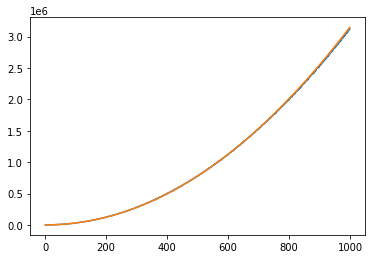

In [ ]:
import matplotlib.pyplot as plt


x = []
error_y = []
r_2_3 = []

for i in range(1,1000):
    x.append(i)
    error_y.append(errors[i - 1])
    r_2_3.append((math.e **1.02745702) * i**(2.01760117))

fig, ax = plt.subplots()
ax.plot(x, error_y)
ax.plot(x, r_2_3)
plt.show()